## CIFAR 10

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

### Downloading CIFAR 10

In [ ]:
from fastai import io

In [ ]:
import tarfile

In [ ]:
def untar_file(file_path, save_path):
    if file_path.endswith('.tar.gz') or file_path.endswith('.tgz'):
        obj = tarfile.open(file_path)
        obj.extractall(save_path)
        obj.close()
        os.remove(file_path)

In [ ]:
cifar_url = 'http://files.fast.ai/data/cifar10.tgz' # faster download
# cifar_url = 'http://pjreddie.com/media/files/cifar.tgz'

io.get_data(cifar_url, 'data/cifar10.tgz')
untar_file('data/cifar10.tgz', 'data/')

### Load classes

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [ ]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [ ]:
bs=128

### Look at data

In [ ]:
data = get_data(32,4)

In [ ]:
x,y=next(iter(data.trn_dl))

In [ ]:
plt.imshow(data.trn_ds.denorm(x)[0]);

In [ ]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [ ]:
from fastai.models.cifar10.resnext import resnext29_8_64

# m = resnext29_8_64()
arch=resnext50
m = arch(False)
bm = BasicModel(m.cuda(), name='cifar10_resnext50')

In [7]:
data = get_data(8,bs*4*2)

In [19]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [20]:
lr=5e-2; wd=5e-4

In [ ]:
learn.lr_find()

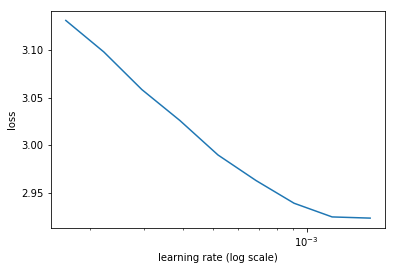

In [10]:
learn.sched.plot()

In [21]:
%time learn.fit(lr, 1, cycle_len=1, use_clr=(20,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/49 [00:00<?, ?it/s]                    


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      1.529941   1.415956   0.479642  

CPU times: user 1min 10s, sys: 26.3 s, total: 1min 36s
Wall time: 1min 21s


[1.4159557, 0.4796416640281677]

In [ ]:
%time learn.fit(lr, 2, cycle_len=1)

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.save('8x8_8')

## 16x16

In [ ]:
learn.load('8x8_8')

In [ ]:
learn.set_data(get_data(16,bs*2))

In [ ]:
%time learn.fit(1e-3, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.sched.plot()

In [ ]:
lr=1e-2

In [ ]:
%time learn.fit(lr, 2, cycle_len=1, wds=wd)

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.save('16x16_8')

## 24x24

In [ ]:
learn.load('16x16_8')

In [ ]:
learn.set_data(get_data(24,bs))

In [ ]:
%time learn.fit(1e-2, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
%time learn.fit(lr, 1, cycle_len=1, wds=wd)

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.save('24x24_8')

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)metrics.log_loss(y,preds), accuracy(preds,y)

## 32x32

In [ ]:
learn.load('24x24_8')

In [ ]:
learn.set_data(get_data(32,bs))

In [ ]:
%time learn.fit(1e-2, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
%time learn.fit(lr, 3, cycle_len=4, wds=wd)

In [ ]:
log_preds,y = learn.TTA()
metrics.log_loss(y,np.exp(log_preds)), accuracy(log_preds,y)

In [ ]:
learn.save('32x32_8')